In [1]:
from cobaya.yaml import yaml_load_file
import arviz as az

# Export the results to GetDist
from getdist.mcsamples import loadMCSamples

# Notice loadMCSamples requires a *full path*
import os
from matplotlib import pyplot as plt
import matplotlib

matplotlib.rcParams.update(
    {
        "font.size": 16,
        "axes.labelsize": 24,
        "axes.titlesize": 18,
        "text.usetex": True,
        "xtick.major.width": 1.5,
        "xtick.minor.width": 1.2,
        "ytick.major.width": 1.5,
        "ytick.minor.width": 1.2,
        "legend.fontsize": 18,
    }
)

In [2]:
az.style.use("arviz-viridish")

# Read files


In [3]:
# 2.6 - 4.6
info_from_yaml = yaml_load_file("../Chains/fps-meant/mf-48-48-z2.6-4.6.input.yaml")
# 2.2 - 4.6
info_from_yaml_2_2 = yaml_load_file("../Chains/fps-meant/mf-48-48-z2.2-4.6.input.yaml")

# FPS only
info_from_yaml_fps_only = yaml_load_file("../Chains/fps-only/mf-48-z2.6-4.6.input.yaml")

info_from_yaml

{'likelihood': {'lyaemu.likelihood.CobayaLikelihoodClass': {'basedir': '../dtau-48-48',
   'HRbasedir': '../dtau-48-48/hires',
   'mean_flux': 's',
   'max_z': 4.6,
   'min_z': 2.6,
   'emulator_class': 'standard',
   't0_training_value': 1.0,
   'optimise_GP': True,
   'emulator_json_file': 'emulator_params.json',
   'data_corr': True,
   'traindir': '../dtau-48-48/trained_mf',
   'loo_errors': True,
   'hprior': True,
   'oprior': False,
   'bhprior': True,
   'tau_thresh': 1000000.0,
   'sim_meant': None,
   'use_meant': True,
   'meant_fac': 8.07,
   'include_emu': False,
   'data_power': None}},
 'params': {'dtau0': {'prior': {'min': -0.4, 'max': 0.25},
   'proposal': 0.006500000000000001,
   'latex': 'd\\tau_0'},
  'tau0': {'prior': {'min': 0.75, 'max': 1.25},
   'proposal': 0.005,
   'latex': '\\tau_0'},
  'ns': {'prior': {'min': 0.8, 'max': 0.995},
   'proposal': 0.0019499999999999995,
   'latex': 'n_\\mathrm{P}'},
  'Ap': {'prior': {'min': 1.2e-09, 'max': 2.6e-09},
   'proposa

In [4]:
info_from_yaml["output"]

'mf-48-48-z2.6-4.6'

In [5]:
# 2.6 - 4.6
gd_sample = loadMCSamples(
    os.path.join("../Chains/fps-meant/", info_from_yaml["output"])
)
# 2.2 - 4.6
gd_sample_2_2 = loadMCSamples(
    os.path.join("../Chains/fps-meant/", info_from_yaml_2_2["output"])
)

# FPS only
gd_sample_fps = loadMCSamples(
    os.path.join("../Chains/fps-only/", info_from_yaml_fps_only["output"])
)

In [6]:
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
# %matplotlib inline  # uncomment if running from the Jupyter notebook

Mean:
[0.0285255  1.09314097]
Covariance matrix:
[[ 0.00130042 -0.00032974]
 [-0.00032974  0.00028838]]


In [7]:
info_from_yaml["params"].keys()

dict_keys(['dtau0', 'tau0', 'ns', 'Ap', 'herei', 'heref', 'alphaq', 'hub', 'omegamh2', 'hireionz', 'bhfeedback', 'a_lls', 'a_dla', 'fSiIII'])

In [8]:
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()

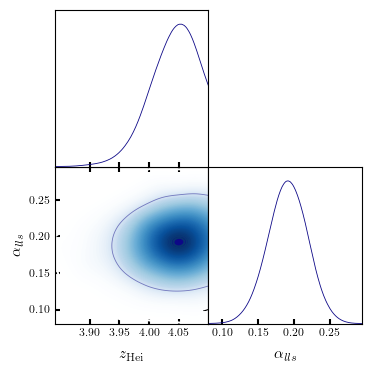

In [9]:
gdplot.triangle_plot(
    gd_sample, ["herei", "a_lls"], filled=True, shaded=True, contour_colors="plasma"
)

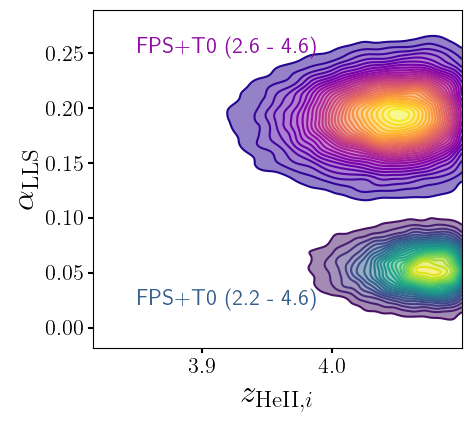

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4.5))
ax = az.plot_kde(
    gd_sample["herei"],
    gd_sample["a_lls"],
    # hdi_probs=[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
    contour_kwargs={"colors": None, "cmap": plt.cm.plasma, "levels": 30},
    contourf_kwargs={"alpha": 0.5, "levels": 30, "cmap": "plasma"},
    ax=ax,
    label="FPS+T0 (2.6 - 4.6)",
)
ax = az.plot_kde(
    gd_sample_2_2["herei"],
    gd_sample_2_2["a_lls"],
    # hdi_probs=[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
    contour_kwargs={"colors": None, "cmap": plt.cm.viridis, "levels": 30},
    contourf_kwargs={"alpha": 0.5, "levels": 30, "cmap": "viridis"},
    ax=ax,
    label="FPS+T0 (2.2 - 4.6)",
)

ax.text(3.85, 0.25, "FPS+T0 (2.6 - 4.6)", color=plt.cm.plasma(0.3))
ax.text(3.85, 0.02, "FPS+T0 (2.2 - 4.6)", color=plt.cm.viridis(0.3))

# ax.set_aspect("equal")
ax.set_xlabel("$z_{\mathrm{HeII}, i}$")
ax.set_ylabel("$\\alpha_\mathrm{LLS}$")
fig.tight_layout()

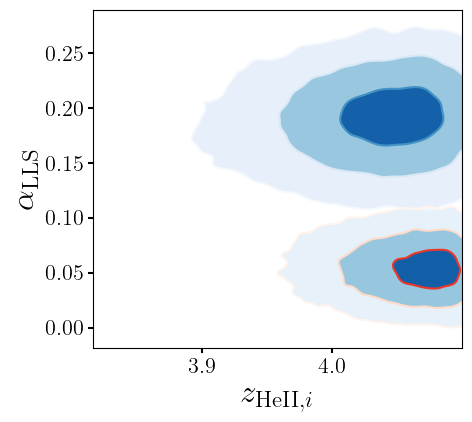

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4.5))
ax = az.plot_kde(
    gd_sample["herei"],
    gd_sample["a_lls"],
    hdi_probs=[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
    contour_kwargs={
        "colors": None,
        "cmap": plt.cm.Blues,
    },
    contourf_kwargs={"cmap": "Blues"},
    # contourf_kwargs={"alpha": 0.5, "levels": 30},
    ax=ax,
)
ax = az.plot_kde(
    gd_sample_2_2["herei"],
    gd_sample_2_2["a_lls"],
    hdi_probs=[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
    contour_kwargs={
        "colors": None,
        "cmap": plt.cm.Reds,
    },
    contourf_kwargs={"cmap": "Blues"},
    # contourf_kwargs={"alpha": 0.5, "levels": 30},
    ax=ax,
)

# ax.set_aspect("equal")
ax.set_xlabel("$z_{\mathrm{HeII}, i}$")
ax.set_ylabel("$\\alpha_\mathrm{LLS}$")
fig.tight_layout()

## DLA


In [8]:
import numpy as np

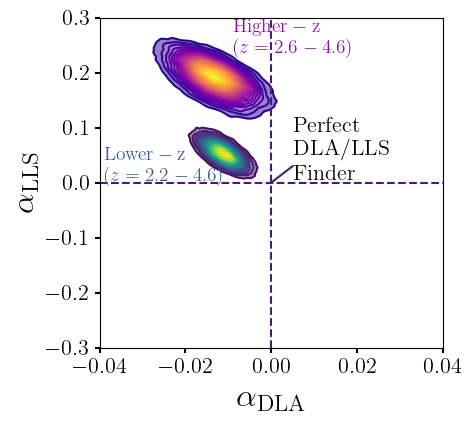

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4.5))
ax = az.plot_kde(
    gd_sample["a_dla"],
    gd_sample["a_lls"],
    # hdi_probs=[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
    contour_kwargs={"colors": None, "cmap": plt.cm.plasma, "levels": 30},
    contourf_kwargs={"alpha": 0.5, "levels": 30, "cmap": "plasma"},
    ax=ax,
    label="FPS+T0 (2.6 - 4.6)",
)
ax = az.plot_kde(
    gd_sample_2_2["a_dla"],
    gd_sample_2_2["a_lls"],
    # hdi_probs=[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
    contour_kwargs={"colors": None, "cmap": plt.cm.viridis, "levels": 30},
    contourf_kwargs={"alpha": 0.5, "levels": 30, "cmap": "viridis"},
    ax=ax,
    label="FPS+T0 (2.2 - 4.6)",
)

ax.text(
    -0.009,
    0.235,
    "$\mathrm{Higher-z}$\n $(z = 2.6 - 4.6)$",
    color=plt.cm.plasma(0.3),
    fontdict={"fontsize": 14},
)
ax.text(
    -0.039,
    0.002,
    "$\mathrm{Lower-z}$\n $(z = 2.2 - 4.6)$",
    color=plt.cm.viridis(0.3),
    fontdict={"fontsize": 14},
)

ax.text(
    0.005,
    0.005,
    "$\mathrm{Perfect}$ \n$\mathrm{DLA/LLS}$\n $\mathrm{Finder}$",
    fontdict={"fontsize": 16},
)
ax.plot(np.linspace(0, 0.005), np.linspace(0, 0.03))

ax.hlines(0.0, -0.04, 0.04, ls="--")
ax.vlines(0.0, -0.3, 0.3, ls="--")
ax.set_xlim(-0.04, 0.04)
ax.set_ylim(-0.3, 0.3)

# ax.set_aspect("equal")
ax.set_xlabel("$\\alpha_\mathrm{DLA}$")
ax.set_ylabel("$\\alpha_\mathrm{LLS}$")
fig.tight_layout()

## Reionization


In [14]:
info_from_yaml["params"].keys()

dict_keys(['dtau0', 'tau0', 'ns', 'Ap', 'herei', 'heref', 'alphaq', 'hub', 'omegamh2', 'hireionz', 'bhfeedback', 'a_lls', 'a_dla', 'fSiIII'])

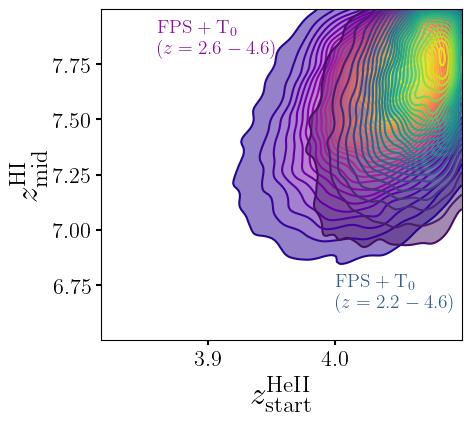

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4.5))
ax = az.plot_kde(
    gd_sample["herei"],
    gd_sample["hireionz"],
    # hdi_probs=[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
    contour_kwargs={"colors": None, "cmap": plt.cm.plasma, "levels": 30},
    contourf_kwargs={"alpha": 0.5, "levels": 30, "cmap": "plasma"},
    ax=ax,
    label="FPS+T0 (2.6 - 4.6)",
)
ax = az.plot_kde(
    gd_sample_2_2["herei"],
    gd_sample_2_2["hireionz"],
    # hdi_probs=[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
    contour_kwargs={"colors": None, "cmap": plt.cm.viridis, "levels": 30},
    contourf_kwargs={"alpha": 0.5, "levels": 30, "cmap": "viridis"},
    ax=ax,
    label="FPS+T0 (2.2 - 4.6)",
)

# ax.text(
#     0.005,
#     0.005,
#     "$\mathrm{Perfect}$ \n$\mathrm{DLA/LLS}$\n $\mathrm{Finder}$",
#     fontdict={"fontsize": 16},
# )
# ax.plot(np.linspace(0, 0.005), np.linspace(0, 0.03))

# ax.hlines(0.0, -0.04, 0.03, ls="--")
# ax.vlines(0.0, -0.1, 0.28, ls="--")
# ax.set_xlim(-0.04, 0.03)
# ax.set_ylim(-0.1, 0.28)

ax.text(
    3.86,
    7.8,
    "$\mathrm{FPS+T}_0$\n $(z = 2.6 - 4.6)$",
    color=plt.cm.plasma(0.3),
    fontdict={"fontsize": 14},
)
ax.text(
    4.0,
    6.65,
    "$\mathrm{FPS+T}_0$\n $(z = 2.2 - 4.6)$",
    color=plt.cm.viridis(0.3),
    fontdict={"fontsize": 14},
)

# ax.set_aspect("equal")
ax.set_xlabel("$z^{\mathrm{HeII}}_{\mathrm{start}}$")
ax.set_ylabel("$z^{\mathrm{HI}}_{\mathrm{mid}}$")
fig.tight_layout()

## AGN Feedback


In [18]:
info_from_yaml["params"]["bhfeedback"]

{'prior': {'min': 0.03, 'max': 0.07},
 'proposal': 0.0004000000000000001,
 'latex': '\\epsilon_{AGN}'}

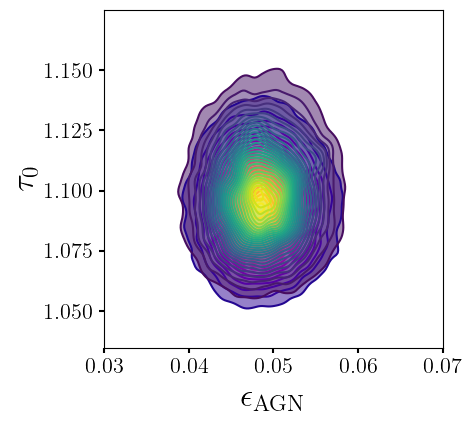

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4.5))
ax = az.plot_kde(
    gd_sample["bhfeedback"],
    gd_sample["tau0"],
    # hdi_probs=[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
    contour_kwargs={"colors": None, "cmap": plt.cm.plasma, "levels": 30},
    contourf_kwargs={"alpha": 0.5, "levels": 30, "cmap": "plasma"},
    ax=ax,
    label="FPS+T0 (2.6 - 4.6)",
)
ax = az.plot_kde(
    gd_sample_fps["bhfeedback"],
    gd_sample_fps["tau0"],
    # hdi_probs=[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
    contour_kwargs={"colors": None, "cmap": plt.cm.viridis, "levels": 30},
    contourf_kwargs={"alpha": 0.5, "levels": 30, "cmap": "viridis"},
    ax=ax,
    label="FPS+T0 (2.2 - 4.6)",
)

# ax.text(
#     0.005,
#     0.005,
#     "$\mathrm{Perfect}$ \n$\mathrm{DLA/LLS}$\n $\mathrm{Finder}$",
#     fontdict={"fontsize": 16},
# )
# ax.plot(np.linspace(0, 0.005), np.linspace(0, 0.03))

# ax.hlines(0.0, -0.04, 0.03, ls="--")
# ax.vlines(0.0, -0.1, 0.28, ls="--")
# ax.set_xlim(-0.04, 0.03)
# ax.set_ylim(-0.1, 0.28)

# ax.text(
#     3.86,
#     7.8,
#     "$\mathrm{FPS+T}_0$\n $(z = 2.6 - 4.6)$",
#     color=plt.cm.plasma(0.3),
#     fontdict={"fontsize": 14},
# )
# ax.text(
#     4.0,
#     6.65,
#     "$\mathrm{FPS+T}_0$\n $(z = 2.2 - 4.6)$",
#     color=plt.cm.viridis(0.3),
#     fontdict={"fontsize": 14},
# )

# ax.set_aspect("equal")
ax.set_xlabel("$\epsilon_\mathrm{AGN}$")
ax.set_ylabel("$\\tau_0$")
ax.set_xlim(0.03, 0.07)
fig.tight_layout()